In [1]:
#import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression #used to make the model
from sklearn.model_selection import train_test_split #used to split the dataset into training and testing
import seaborn as sns #visualisation
import matplotlib.pyplot as plt

In [2]:
#import data
#df = pd.read_csv(r'C:\Users\steph\Desktop\Petes Jupyter Work\CardioGoodFitness.csv') #Use this at home
df = pd.read_csv('CardioGoodFitness.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [5]:
#No null values I would like to remove certain cells that appear to have no point
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


 The team identifies the following customer variables to study:
 ● product purchased, TM195, TM498, or TM798
 ● gender
 ● age, in years
 ● education, in years
 ● relationship status, single or partnered
 ● annual household income (dollars)
 ● average number of times the customer plans to use the treadmill each week
 ● average number of miles the customer expects to walk/run each week
 ● self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

In [6]:
tmp = df['Product'].value_counts()
tmp

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

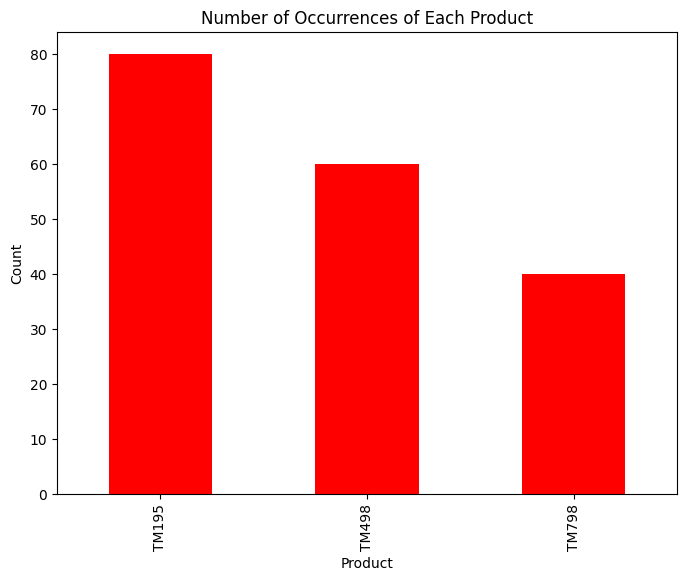

In [7]:
# Plotting
plt.figure(figsize=(8, 6))
tmp.plot(kind='bar', color='red')

# Adding labels and title
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Number of Occurrences of Each Product')

# Show the plot
plt.show()

In [8]:
df[df['Product'] == 'TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


80 customers bought TM195 model
Average age of customer who purchases TM195 is 28.5 , Median is 26 . Data is right skewed.
Average Education is 15 and median is 16.
Expected usage is 3 day a week
Expected Miles to run is on an Average 82.78 miles per week and median is 85.
Self rated fitness is 3 that is average fitness level
Average income and median is around $46K.

In [9]:
df[df['Product'] == 'TM498'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


There are 60 customers who purchased TM 498 Model
Average age of customer who purchases TM498 is 28.9 , Median is 26 . Age is right skewed. Customer range is between 24-33.
Average Education is 15 and median is 16.
Expected usage is 3 day a week
Expected Miles to run is on an Average 60 miles per week and median is 85.
Average Income is 48973.
Median Income is 49459

In [10]:
df[df['Product'] == 'TM798'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


Average age of customer who purchases TM798 is 29 , Median is 27 .
Average Education is 17 and median is 18.
Expected usage is 4-5 day a week
Expected Miles to run is on an Average 166 miles per week and median is 160.
Average Income is 75K and median is 76K

In [11]:
gen = df['Gender'].value_counts()
gen

Male      104
Female     76
Name: Gender, dtype: int64

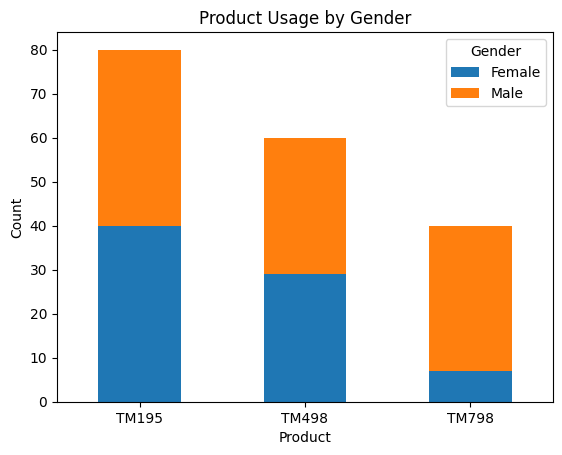

In [12]:

product_gender_counts = df.groupby(['Product', 'Gender']).size().unstack(fill_value=0)

product_gender_counts.plot(kind='bar', stacked=True)

plt.title('Product Usage by Gender')

plt.xlabel('Product')

plt.ylabel('Count')

plt.xticks(rotation=0)

plt.legend(title='Gender')

plt.show()

In [13]:
df.groupby(['Product', 'Gender'])['Usage'].mean()

Product  Gender
TM195    Female    2.900000
         Male      3.275000
TM498    Female    3.137931
         Male      3.000000
TM798    Female    5.000000
         Male      4.727273
Name: Usage, dtype: float64

In [14]:
df.groupby(['Product', 'Miles'])['Usage'].mean()

Product  Miles
TM195    38       2.000000
         47       2.555556
         56       2.166667
         66       2.900000
         75       3.100000
         85       3.125000
         94       3.750000
         103      3.000000
         112      3.000000
         113      3.375000
         132      4.000000
         141      4.500000
         169      4.000000
         188      5.000000
TM498    21       2.000000
         42       2.000000
         53       2.714286
         64       2.500000
         74       3.000000
         85       2.909091
         95       3.250000
         106      3.500000
         127      3.800000
         170      4.000000
         212      5.000000
TM798    80       4.000000
         100      4.142857
         106      4.000000
         120      3.666667
         140      4.000000
         150      5.250000
         160      4.600000
         170      4.000000
         180      5.500000
         200      4.833333
         240      6.000000
         260 

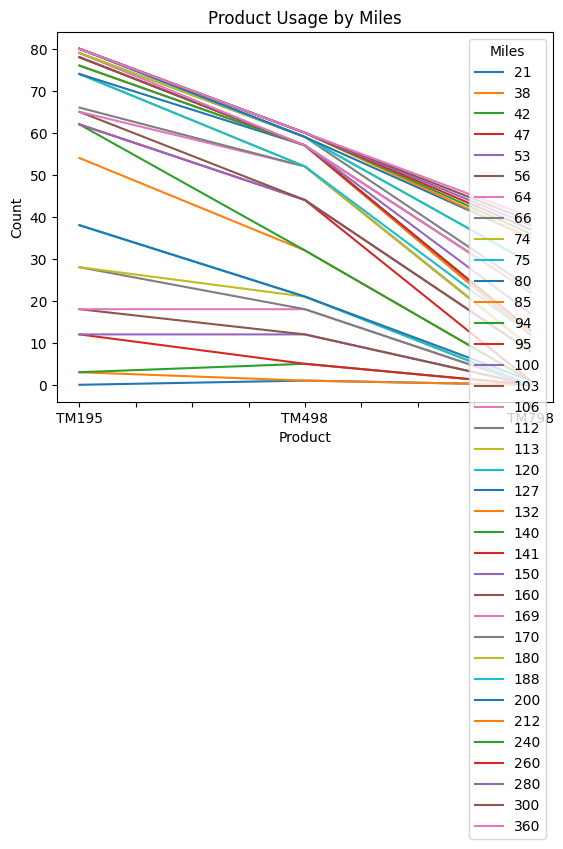

In [15]:
pmic = df.groupby(['Product', 'Miles']).size().unstack(fill_value=0)

pmic.plot(kind='line', stacked=True)

plt.title('Product Usage by Miles')

plt.xlabel('Product')

plt.ylabel('Count')

plt.xticks(rotation=0)

plt.legend(title='Miles')

plt.show()

In [16]:
df.groupby(['Product', 'Education'])['Usage'].mean()

Product  Education
TM195    12           3.500000
         13           3.333333
         14           2.800000
         15           2.750000
         16           3.307692
         18           3.000000
TM498    12           2.000000
         13           4.000000
         14           3.130435
         15           3.000000
         16           3.032258
         18           2.500000
TM798    14           5.500000
         16           4.533333
         18           4.947368
         20           4.000000
         21           4.666667
Name: Usage, dtype: float64

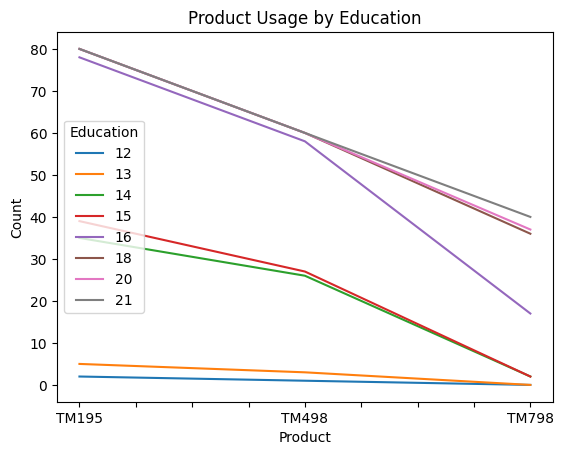

In [17]:
pec = df.groupby(['Product', 'Education']).size().unstack(fill_value=0)

pec.plot(kind='line', stacked=True)

plt.title('Product Usage by Education')

plt.xlabel('Product')

plt.ylabel('Count')

plt.xticks(rotation=0)

plt.legend(title='Education')

plt.show()

In [18]:
df.groupby(['Product', 'MaritalStatus'])['Usage'].mean()

Product  MaritalStatus
TM195    Partnered        3.041667
         Single           3.156250
TM498    Partnered        3.055556
         Single           3.083333
TM798    Partnered        4.913043
         Single           4.588235
Name: Usage, dtype: float64

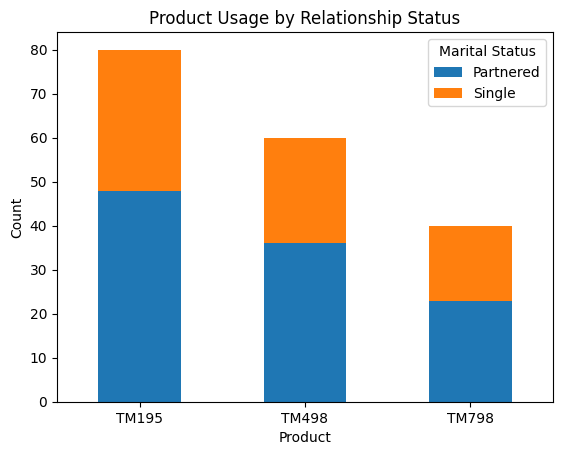

In [19]:
pmc = df.groupby(['Product', 'MaritalStatus']).size().unstack(fill_value=0)

pmc.plot(kind='bar', stacked=True)

plt.title('Product Usage by Relationship Status')

plt.xlabel('Product')

plt.ylabel('Count')

plt.xticks(rotation=0)

plt.legend(title='Marital Status')

plt.show()

In [20]:
df.groupby(['Product', 'Income'])['Usage'].mean()

Product  Income
TM195    29562     3.0
         30699     4.0
         31836     2.0
         32973     3.0
         34110     2.0
                  ... 
TM798    95508     4.0
         95866     4.0
         99601     5.0
         103336    5.0
         104581    4.5
Name: Usage, Length: 83, dtype: float64

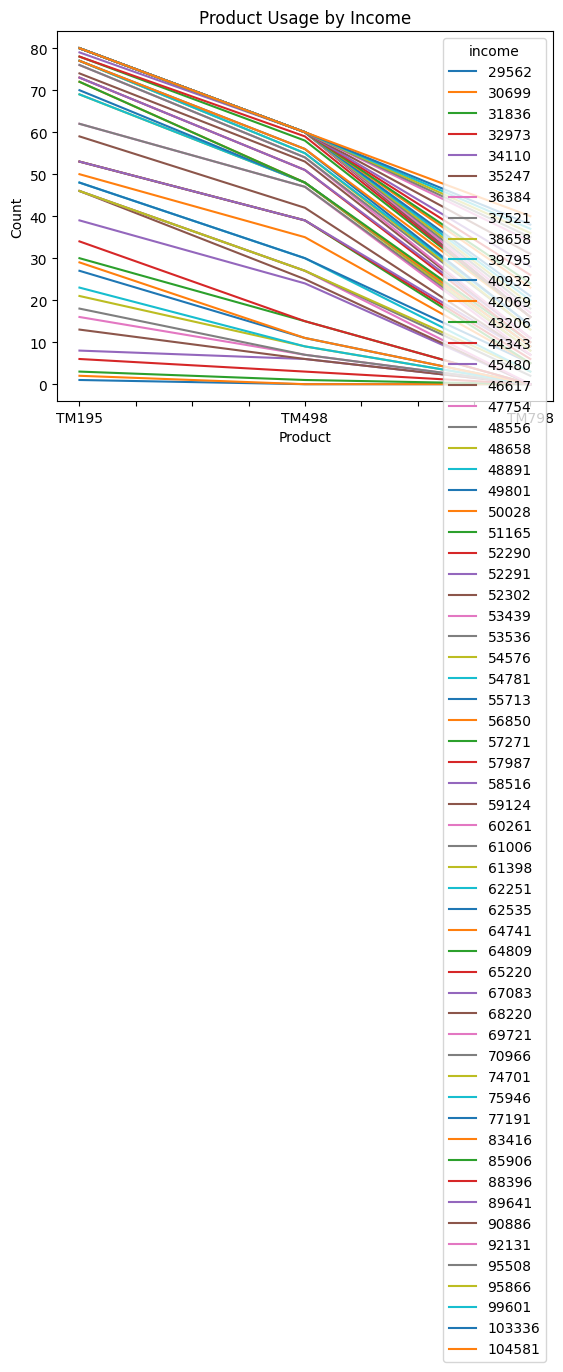

In [21]:
#showing this type of data plotting doesn't work and moved on to grouping incomes to make the visualisation manageable
pic = df.groupby(['Product', 'Income']).size().unstack(fill_value=0)

pic.plot(kind='line', stacked=True)

plt.title('Product Usage by Income')

plt.xlabel('Product')

plt.ylabel('Count')

plt.xticks(rotation=0)

plt.legend(title='income')

plt.show()

In [22]:
df.groupby(['Product', 'Fitness'])['Usage'].mean()

Product  Fitness
TM195    1          3.000000
         2          2.428571
         3          3.129630
         4          3.555556
         5          4.500000
TM498    1          2.000000
         2          2.666667
         3          3.128205
         4          3.500000
TM798    3          4.000000
         4          4.857143
         5          4.862069
Name: Usage, dtype: float64

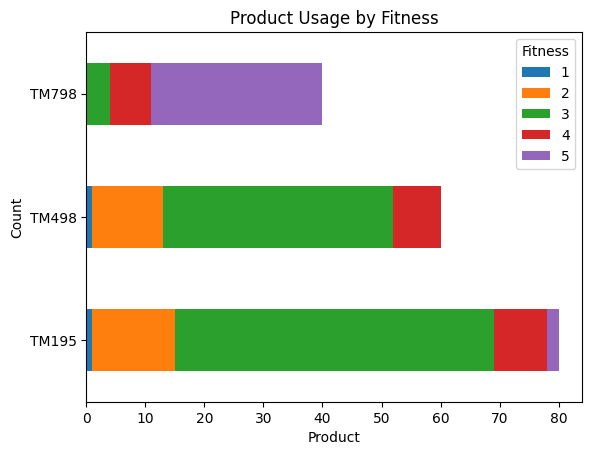

In [23]:
pfc1 = df.groupby(['Product', 'Fitness']).size().unstack(fill_value=0)

pfc1.plot(kind='barh', stacked=True)

plt.title('Product Usage by Fitness')

plt.xlabel('Product')

plt.ylabel('Count')

plt.xticks(rotation=0)

plt.legend(title='Fitness')

plt.show()

In [24]:
# Define income thresholds for low, medium, and high categories
low_threshold = 40000
med_threshold = 70000
high_threshold = 90000

# Create a mask based on income thresholds
low_income_mask = df['Income'] < low_threshold
medium_income_mask = (df['Income'] >= low_threshold) & (df['Income'] < high_threshold)
high_income_mask = df['Income'] >= high_threshold

# Assign categories based on masks
df['Income_Category'] = 'Low'
df.loc[medium_income_mask, 'Income_Category'] = 'Medium'
df.loc[high_income_mask, 'Income_Category'] = 'High'

In [25]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Category
0,TM195,18,Male,14,Single,3,4,29562,112,Low
1,TM195,19,Male,15,Single,2,3,31836,75,Low
2,TM195,19,Female,14,Partnered,4,3,30699,66,Low
3,TM195,19,Male,12,Single,3,3,32973,85,Low
4,TM195,20,Male,13,Partnered,4,2,35247,47,Low


In [26]:
df.groupby(['Product', 'Income_Category'])['Usage'].mean()

Product  Income_Category
TM195    Low                3.173913
         Medium             3.052632
TM498    Low                2.888889
         Medium             3.098039
TM798    High               4.750000
         Medium             4.785714
Name: Usage, dtype: float64

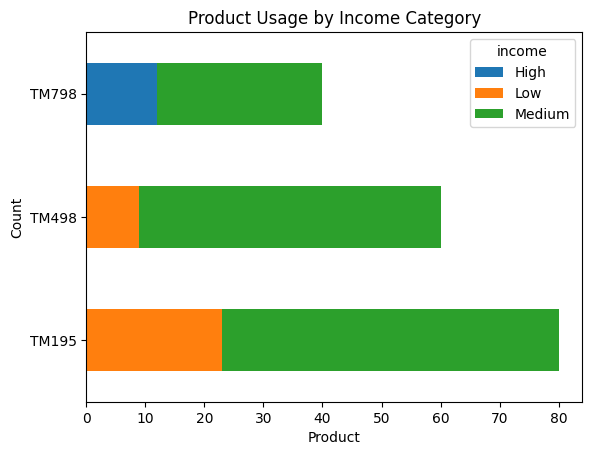

In [27]:
pic = df.groupby(['Product', 'Income_Category']).size().unstack(fill_value=0)

pic.plot(kind='barh', stacked=True)

plt.title('Product Usage by Income Category')

plt.xlabel('Product')

plt.ylabel('Count')

plt.xticks(rotation=0)

plt.legend(title='income')

plt.show()

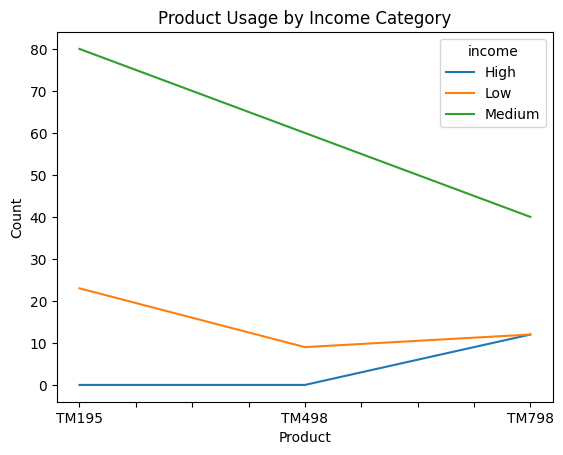

In [28]:
pic = df.groupby(['Product', 'Income_Category']).size().unstack(fill_value=0)

pic.plot(kind='line', stacked=True)

plt.title('Product Usage by Income Category')

plt.xlabel('Product')

plt.ylabel('Count')

plt.xticks(rotation=0)

plt.legend(title='income')

plt.show()

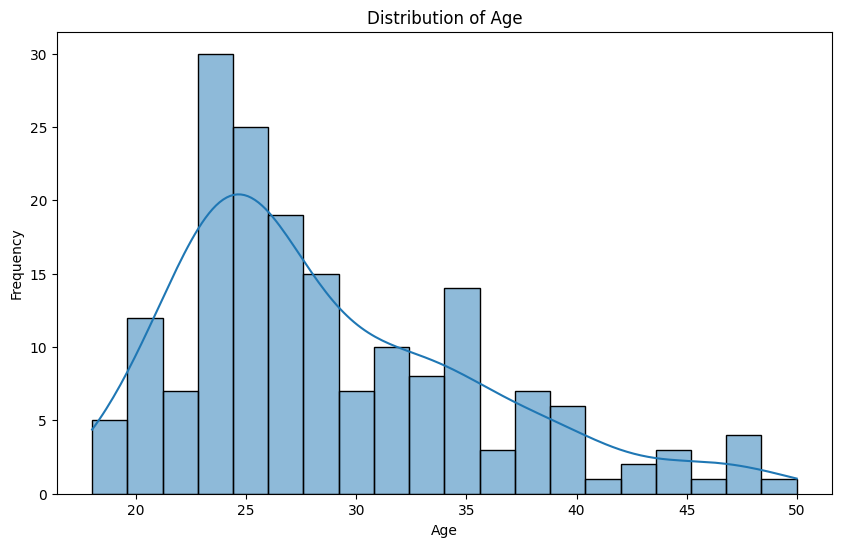

In [29]:
# Remove duplicates (Not for this df)
#df.drop_duplicates(inplace=True)

# Data visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



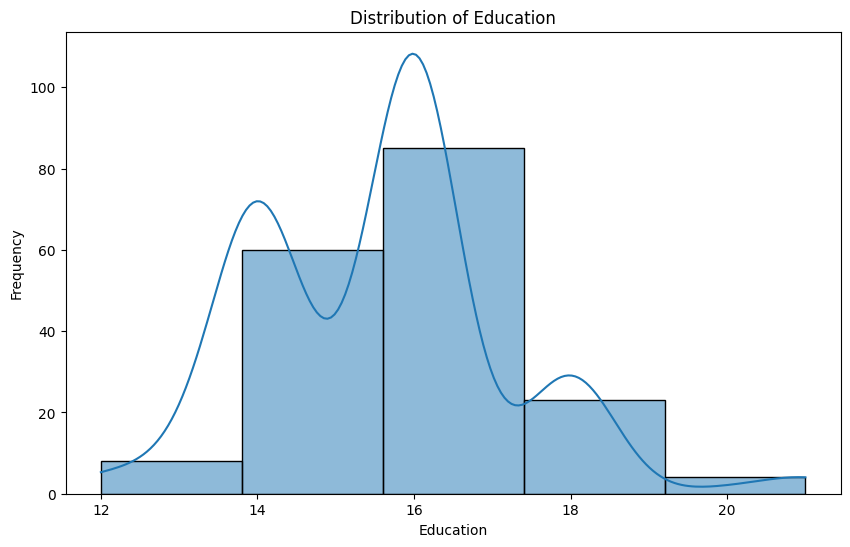

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Education'], bins=5, kde=True)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

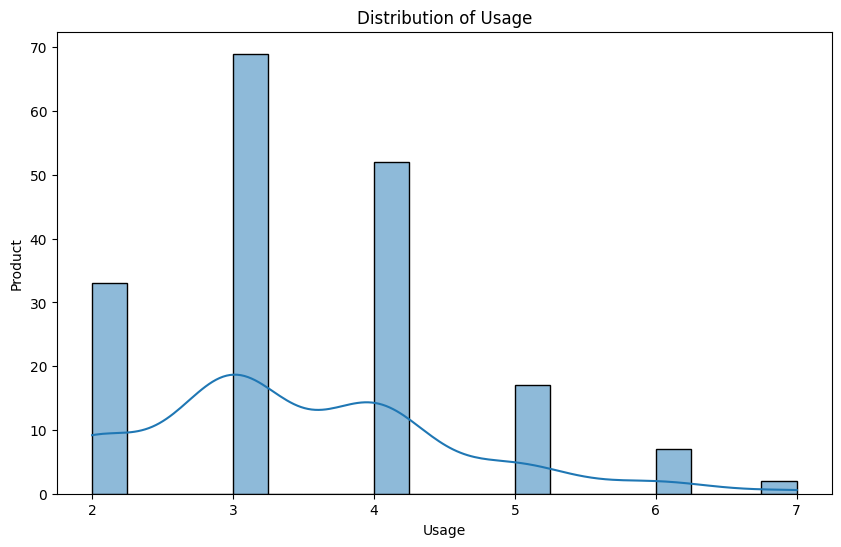

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Usage'], bins=20, kde=True)
plt.title('Distribution of Usage')
plt.xlabel('Usage')
plt.ylabel('Product')
plt.show()

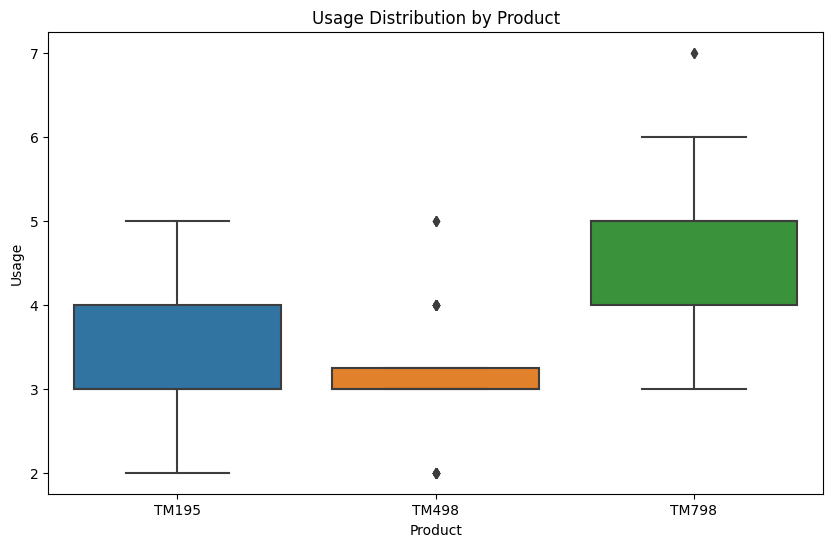

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product', y='Usage', data=df)
plt.title('Usage Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Usage')
plt.show()

In [33]:
print(df.groupby('Product')['Usage'].mean())

Product
TM195    3.087500
TM498    3.066667
TM798    4.775000
Name: Usage, dtype: float64


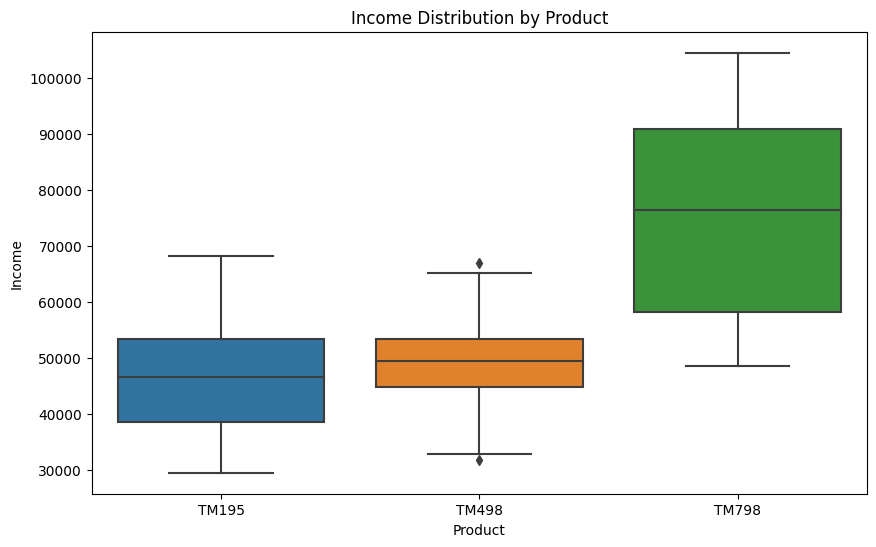

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product', y='Income', data=df)
plt.title('Income Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Income')
plt.show()



In [35]:
# Descriptive statistics
print(df.groupby('Gender')['Age'].mean())

#Shows the average age of the purchaser

Gender
Female    28.565789
Male      28.951923
Name: Age, dtype: float64


In [36]:
#How many were purchased by each marital category
print(pd.crosstab(df['MaritalStatus'], df['Product']))

Product        TM195  TM498  TM798
MaritalStatus                     
Partnered         48     36     23
Single            32     24     17


In [37]:
# Inferential statistics
print(df['Age'].corr(df['Fitness']))

# Data presentation
# Summarize key findings in a presentation format

0.06110454181384108


The value you received (0.06110454181384099) is the correlation coefficient between two variables, which is a result of inferential statistics.

In this context, the correlation coefficient measures the strength and direction of the linear relationship between two numerical variables. The correlation coefficient ranges from -1 to 1:

1 indicates a perfect positive linear relationship,
-1 indicates a perfect negative linear relationship,
0 indicates no linear relationship.
Your correlation coefficient of approximately 0.061 suggests a very weak positive linear relationship between the variables you analyzed. In other words, as one variable increases, the other tends to increase slightly, but the relationship is not strong.

In your case, the variables analyzed were likely 'age' and 'fitness', and a correlation coefficient of 0.061 indicates a weak positive association between age and self-rated fitness. However, it's important to note that correlation does not imply causation, and other factors may influence this relationship.

You can interpret the correlation coefficient as a measure of the degree of linear association between the variables, but it does not provide information about the causality or the strength of any relationship outside of linear associations.

In [38]:
#Now to correllate the next set of data

#Fitness, usage and miles

In [39]:
# Calculate correlation matrix
correlation_matrix = df[['Fitness', 'Usage', 'Miles']].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          Fitness     Usage     Miles
Fitness  1.000000  0.668606  0.785702
Usage    0.668606  1.000000  0.759130
Miles    0.785702  0.759130  1.000000


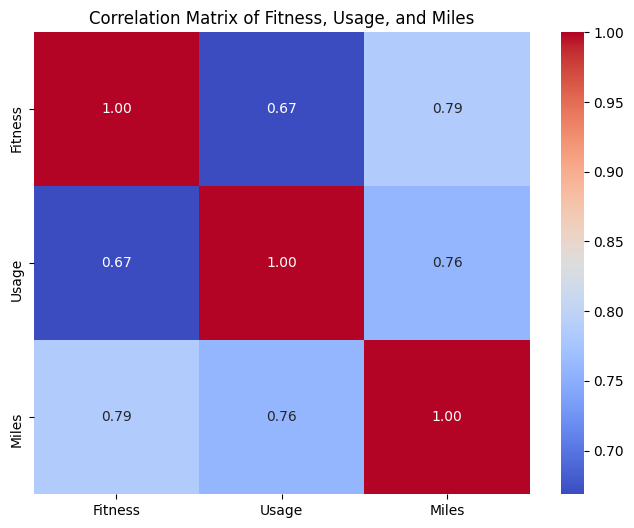

In [40]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Fitness, Usage, and Miles')
plt.show()

#The annot=True parameter adds annotations to each cell with the correlation coefficient values.

In [41]:
correlation_mean = df[['Fitness', 'Usage', 'Miles']].mean()

correlation_mean

Fitness      3.311111
Usage        3.455556
Miles      103.194444
dtype: float64

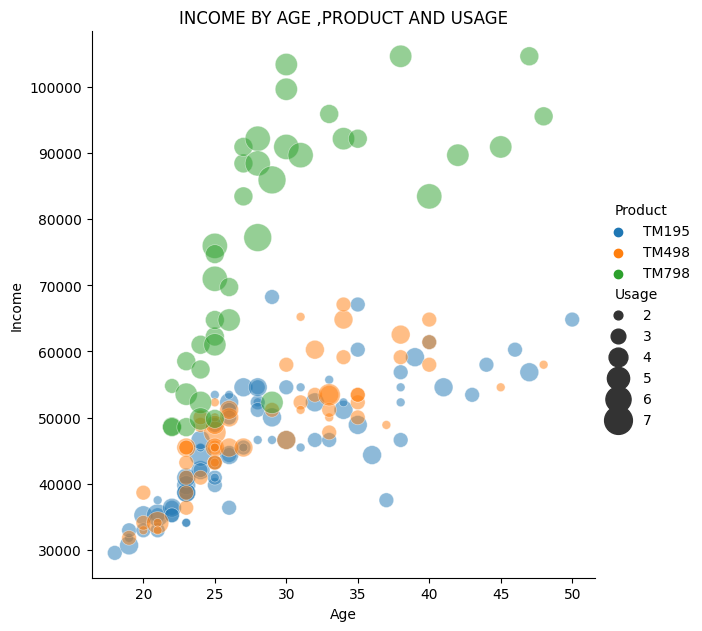

In [42]:
#scatter plot between income, age ,product and usage
sns.relplot(x="Age", y="Income", hue="Product", size="Usage",
            sizes=(40, 400), alpha=.5,
            height=6, data=df).set(title='INCOME BY AGE ,PRODUCT AND USAGE');

In [43]:
#I'll repeat with Age added as it seems the best way

# Calculate correlation matrix
correlation_matrix2 = df[['Age', 'Fitness', 'Usage', 'Miles']].corr()

# Display correlation matrix
print("Correlation Matrix2:")
print(correlation_matrix2)

Correlation Matrix2:
              Age   Fitness     Usage     Miles
Age      1.000000  0.061105  0.015064  0.036618
Fitness  0.061105  1.000000  0.668606  0.785702
Usage    0.015064  0.668606  1.000000  0.759130
Miles    0.036618  0.785702  0.759130  1.000000


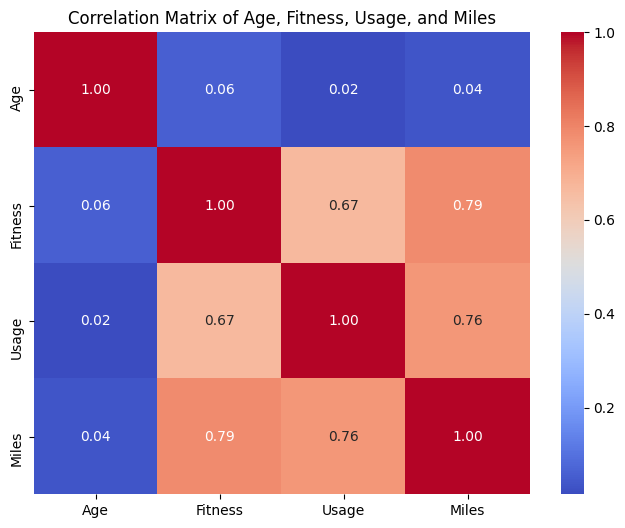

In [44]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Age, Fitness, Usage, and Miles')
plt.show()

While there is some positive correlation between 'Age' and each of these variables, it's important to note that the correlations are very weak. Other factors likely have a stronger influence on 'Fitness', 'Usage', and 'Miles' than age alone.


In [45]:
#now to correlate all columns!

df.columns.tolist()

['Product',
 'Age',
 'Gender',
 'Education',
 'MaritalStatus',
 'Usage',
 'Fitness',
 'Income',
 'Miles',
 'Income_Category']

In [46]:
# Calculate correlation matrix
correlation_matrix3 = df[['Product',
 'Age',
 'Gender',
 'Education',
 'MaritalStatus',
 'Usage',
 'Fitness',
 'Income',
 'Miles',
 'Income_Category']].corr()

# Display correlation matrix
print("Correlation Matrix3:")
print(correlation_matrix3)

Correlation Matrix3:
                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000


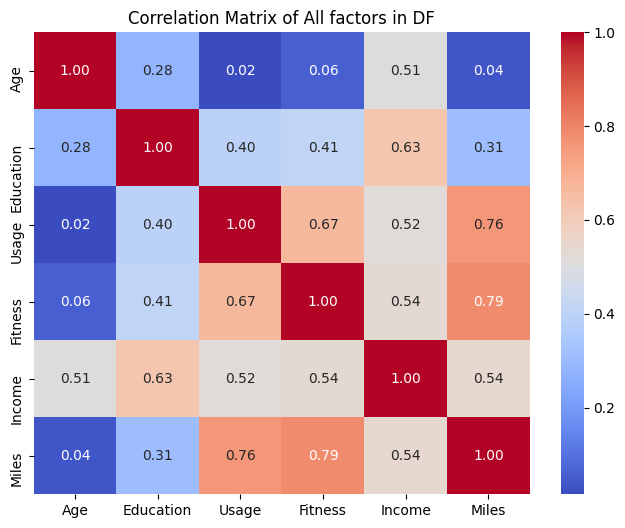

In [47]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All factors in DF')
plt.show()

In [48]:
corr_pairs = df.corr().unstack() # give pairs of correlation
print( corr_pairs[abs(corr_pairs)>0.5]) # Gives us correlated data

Age        Age          1.000000
           Income       0.513414
Education  Education    1.000000
           Income       0.625827
Usage      Usage        1.000000
           Fitness      0.668606
           Income       0.519537
           Miles        0.759130
Fitness    Usage        0.668606
           Fitness      1.000000
           Income       0.535005
           Miles        0.785702
Income     Age          0.513414
           Education    0.625827
           Usage        0.519537
           Fitness      0.535005
           Income       1.000000
           Miles        0.543473
Miles      Usage        0.759130
           Fitness      0.785702
           Income       0.543473
           Miles        1.000000
dtype: float64


This correlation matrix represents the correlation coefficients between different variables:

Age: It has a moderate positive correlation with Income (0.513) and a weak positive correlation with Education (0.280) and Fitness (0.061). It has negligible correlations with Usage (0.015) and Miles (0.037).

Education: It shows a moderate positive correlation with Income (0.626), Usage (0.395), Fitness (0.411), and Miles (0.307).

Usage: There's a strong positive correlation between Usage and both Fitness (0.669) and Miles (0.759). It also has moderate positive correlations with Education (0.395) and Income (0.520).

Fitness: Similar to Usage, Fitness has a strong positive correlation with both Usage (0.669) and Miles (0.786). It also has a moderate positive correlation with Education (0.411) and Income (0.535).

Income: Income shows moderate positive correlations with Education (0.626), Usage (0.520), Fitness (0.535), and Miles (0.543).

Miles: Miles has a strong positive correlation with both Usage (0.759) and Fitness (0.786). It also has moderate positive correlations with Education (0.307) and Income (0.543).

Overall, from this correlation matrix, we can see that Usage, Fitness, and Miles are highly interrelated, which is intuitive as they are all related to physical activity. Education and Income also show significant positive correlations with various other variables, suggesting potential relationships between socioeconomic status, education level, and fitness-related behaviors. However, correlation does not imply causation, so further analysis would be needed to understand the underlying relationships.

Observation:

There are 3 different treadmills products.
There are both Partnered and single customers
Age of customers ranges from 18 to 50
Education in years is from 12 -21
Usage is from 2 days to 7 days a week
Fitness level of customers from 1 -5

Age of customer using treadmill is between range 18 - 50 . Average age is 28.78 and median is 26.
Maximum income of treadmill user is 100K , Average income approx. 54K ,while median is is approx. 51K.
Expected Treadmill usage is atleast Once a week , maximum is 7 times a week and on Average 3 times a week
Customer education is between 12 -21 years, with average and median of 16 years and maximum of 21 years
Customer expects to runs on an average of 103.19 miles per week, median 94 miles per week.
Average self rated fitness is 3.

TM195 treadmill model is most sold model.

There are 76 female and 104 males customers. More Male customers are buying treadmill compared to female customer

There are 107 Partnered and 73 single customers. Customers who are Partnered are buying treadmill more compared to single customer.

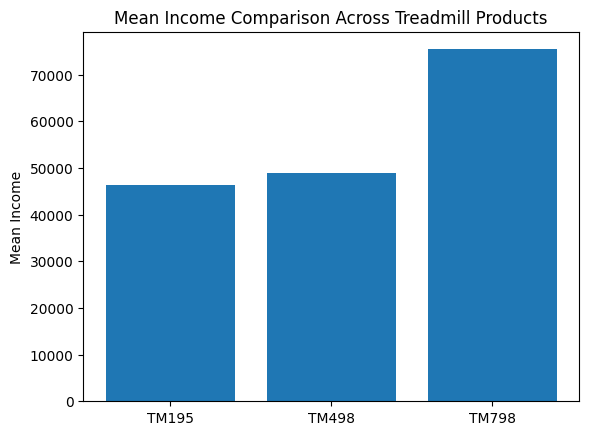

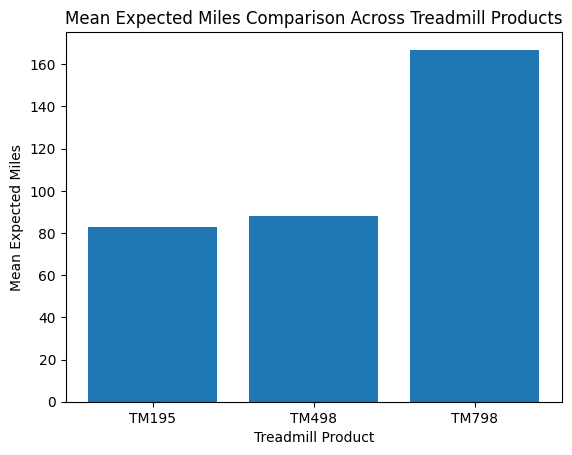

In [49]:
products = ['TM195', 'TM498', 'TM798']

income_means = [46418.03, 48973.65, 75441.58]


plt.bar(products, income_means)

plt.ylabel('Mean Income')

plt.title('Mean Income Comparison Across Treadmill Products')

plt.show()



products = ['TM195', 'TM498', 'TM798']

mileage_means = [82.79, 87.93, 166.90]
 
 
plt.bar(products, mileage_means)

plt.xlabel('Treadmill Product')

plt.ylabel('Mean Expected Miles')

plt.title('Mean Expected Miles Comparison Across Treadmill Products')

plt.show()